In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import Modulo_Flavio as mod
import plt_conf as conf
conf.general()  # cargando configuración general

In [2]:
C0 = 4.1e6
lamLeft, lamRight = 0.05, 0.1

Left, LCont = mod.NumSol(C0, lamLeft,Npt=50000, iter='d',
           xmin=0, xmax=10, metodo='RK45', Rtol=1e-9, Atol=1e-10, info=True)

Right, RCont = mod.NumSol(C0, lamRight,Npt=50000, iter='d',
           xmin=0, xmax=10, metodo='RK45', Rtol=1e-9, Atol=1e-10, info=True)

lambda -> 0.05  Lambda ->  2.259158114323816e-12
numerica ->  [ 2.25858385e-12+0.j         -1.12887849e-12+3.35410197j
 -1.12949864e-12-3.35410197j]
analitico ->  2.2593038551121936e-12
[0.9000049399247132, 0.009997081984943028]
Sch. radio ->  12111918875.72716
Horizon located in r =  0.4552411023769211
lambda -> 0.1  Lambda ->  2.259158114323816e-12
numerica ->  [ 2.25862809e-12+0.j         -1.12902170e-12+2.37170825j
 -1.12946021e-12-2.37170825j]
analitico ->  2.2593038551121936e-12
[0.9000098799247113, 0.009994163984942983]


c:\Users\flavi\Dropbox\Flavio_Proyectos\Cubic Gravity (No se ha abandonado... aun)\Modulo_Flavio.py:56: RuntimeWarning: divide by zero encountered in scalar divide
  f2 = (-(r**2*(3 - 3*r + Lambda*r**3 + 3*r*y)) - 72*lamb*(-1 + y)*y*y1 + 36*lamb*r*y1**2 + 12*lamb*r**2*y1**3)/(36.*lamb*r*y*(2 - 2*y + r*y1))
c:\Users\flavi\Dropbox\Flavio_Proyectos\Cubic Gravity (No se ha abandonado... aun)\Modulo_Flavio.py:56: RuntimeWarning: invalid value encountered in scalar multiply
  f2 = (-(r**2*(3 - 3*r + Lambda*r**3 + 3*r*y)) - 72*lamb*(-1 + y)*y*y1 + 36*lamb*r*y1**2 + 12*lamb*r**2*y1**3)/(36.*lamb*r*y*(2 - 2*y + r*y1))
c:\Users\flavi\Dropbox\Flavio_Proyectos\Cubic Gravity (No se ha abandonado... aun)\Modulo_Flavio.py:56: RuntimeWarning: invalid value encountered in scalar divide
  f2 = (-(r**2*(3 - 3*r + Lambda*r**3 + 3*r*y)) - 72*lamb*(-1 + y)*y*y1 + 36*lamb*r*y1**2 + 12*lamb*r**2*y1**3)/(36.*lamb*r*y*(2 - 2*y + r*y1))


Sch. radio ->  12111918875.72716
Horizon located in r = 0 Naked Singularity


<>:30: SyntaxWarning: invalid escape sequence '\l'
<>:30: SyntaxWarning: invalid escape sequence '\l'
C:\Users\flavi\AppData\Local\Temp\ipykernel_43744\2801655951.py:30: SyntaxWarning: invalid escape sequence '\l'
  ax[i].text(0.7, 0.65, r'$' + f'\lambda= {round(lambdas[i],3)}' + r'\quad \Lambda \approx 1.54 \times 10^{-32}$',


lambda -> 0.05  Lambda ->  1.6218994877898773e-32
numerica ->  [-8.26865771e-16+0.j          6.20149328e-16+3.35410197j
 -0.00000000e+00-3.35410197j]
analitico ->  0.0
lambda -> 0.1  Lambda ->  1.6218994877898773e-32
numerica ->  [-2.92341197e-16+0.j          4.38511795e-16+2.37170825j
 -0.00000000e+00-2.37170825j]
analitico ->  0.0


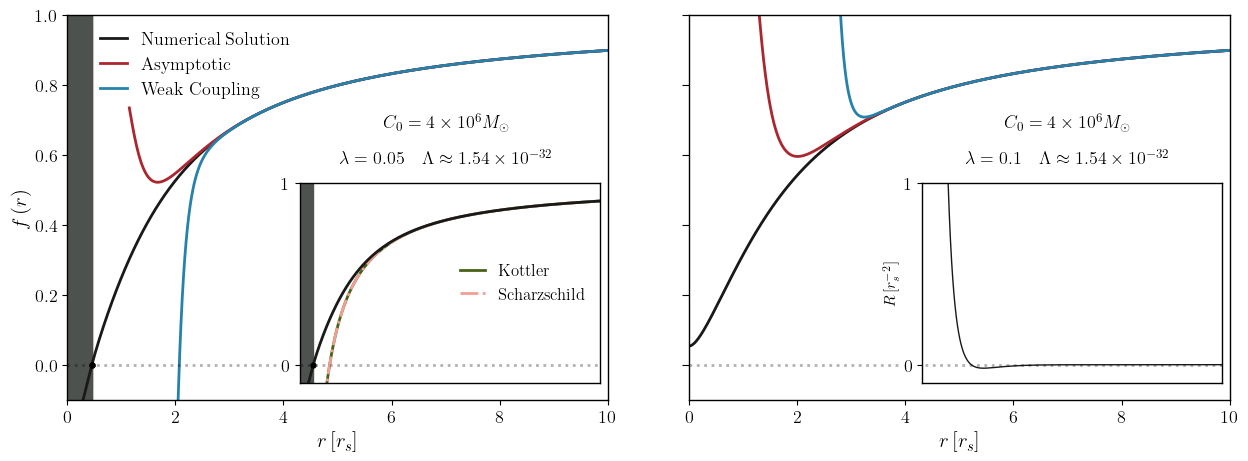

In [10]:
############# Vamos a Plotear ###############

Lambda = 1.6218994877898773e-32

col = ['#1a1919', '#f0784d', '#2681ab', '#ab262f', '#bc92e0', '#486318', '#ed5b0c', 
      '#f0a092', '#484f07', '#694d0c']
PlotNames = [r'$f( \bar{r})_{asy}$',r'$f( \bar{r})_{nh}$',r'$f( \bar{r})_{wcs}$']
LineStyles = ['-.','--','dotted']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5), gridspec_kw=dict(hspace=0.1, wspace=.15))
FunCon = [LCont, RCont]
rhval = [Left.t_events[0][0],0] 
lambdas = [lamLeft,lamRight]
WeakLims = [2,2.5]
AsyLims = [1.15,1.3]

for i in range(len(FunCon)):
    r_vals = np.linspace(10,0,1000)
    r_valsW = np.linspace(10,WeakLims[i],1000)
    r_valsA = np.linspace(10,AsyLims[i],1000)
    ax[i].plot(r_vals, FunCon[i](r_vals),color=col[0], label=r'Numerical Solution')
    ax[i].plot(r_valsA,mod.SAsy(r_valsA, lambdas[i], Lambda)[0],color=col[3] ,label=r'Asymptotic')
    ax[i].plot(r_valsW, mod.SeW(r_valsW,lambdas[i],Lambda)[0],color=col[2] ,label=r'Weak Coupling')

    ax[i].hlines(y=0, xmin=0, xmax=3.93,  ls=':', color='k', alpha=0.3)
    ax[i].text(0.7, 0.7, r' $C_0=4 \times 10^6 M_{\odot}$', 
           fontsize=13, ha='center', va='bottom', transform=ax[i].transAxes)
    #ax[i].text(0.7, 0.65, r'$' + f'\lambda= {round(lambdas[i],3)}' + r'\left[M_{\mathrm{Pl}}\right] \quad \Lambda \approx 1.54 \times 10^{-32}\left[ m^{-2}\right]$', 
    #       fontsize=13, ha='center', va='top', transform=ax[i].transAxes)
    ax[i].text(0.7, 0.65, r'$' + f'\lambda= {round(lambdas[i],3)}' + r'\quad \Lambda \approx 1.54 \times 10^{-32}$', 
           fontsize=13, ha='center', va='top', transform=ax[i].transAxes)
    ax[0].plot(Left.t_events, [0], 'ko', markersize=3.5)


    ax[0].axvspan(xmin=0, xmax=rhval[0], ymin=0, ymax=1, color='#4e524f')
    ax[i].set_ylim(-0.1, 1)
    ax[i].set_xlim(0,10)
    ax[i].set_xlabel(r"$r\, [r_s]$")
    ax[0].set_ylabel(r'$f\,(r)$')
    ax[1].tick_params(axis='y', length=5, labelleft=False)

    ax[0].legend(frameon=False, loc='upper left', fontsize=13, bbox_to_anchor=(0.03, 1))

############## Insets #############################
 
###################### Left Inset ######################################
left, bottom, width, height = [0.28, 0.145, 0.2, 0.4]  # posición y dimensiones del insert
ax_inset = fig.add_axes([left, bottom, width, height])

in_vals=np.linspace(-1,10,1000)
ax_inset.plot(in_vals,mod.Kottler(in_vals,Lambda,lamLeft),color=col[5] ,label=r'Kottler')
ax_inset.plot(in_vals, mod.Sch(in_vals, lamLeft, Lambda), color = col[7], ls =LineStyles[0] ,label=r'Scharzschild')
ax_inset.plot(in_vals, LCont(in_vals),color=col[0])
ax_inset.plot(Left.t_events, [0], 'ko', markersize=3.5)
ax_inset.set_xlim(0,10)
ax_inset.set_ylim(-0.1,1)
ax_inset.legend(frameon=False, loc = 'center right',fontsize=12)
ax_inset.axvspan(xmin=0, xmax=rhval[0], ymin=0, ymax=1, color='#4e524f')
ax_inset.hlines(y=0, xmin=0, xmax=12, ls=':', color='k', alpha=0.3)
ax_inset.set_xticks([])
ax_inset.set_yticks([0,1])

########## Right Inset ################
ax_inset1 = fig.add_axes([left+0.415, bottom, width, height])
y=Right.y[0]
y1=Right.y[1]
r= Right.t
ax_inset1.plot(r,mod.RicciScalar(r,y,y1,Lambda,lamRight),lw=1,color=col[0])
ax_inset1.set_xlim(-0.1,10)
ax_inset1.set_ylim(-0.1,1)
ax_inset1.hlines(y=0, xmin=0, xmax=12, ls=':', color='k', alpha=0.3)
ax_inset1.set_ylabel(r'$R\,[r_{s}^{-2}]$', fontsize=11)
ax_inset1.set_xticks([])
ax_inset1.set_yticks([0,1])


plt.savefig('Validity_Series.pdf', format='pdf', bbox_inches='tight')


In [ ]:
##Solucion para triangulos
C0 = 4.1e6
lamda = 0.05
Sol, SolCont = mod.NumSol(C0, lamda,Npt=50000, iter='d',
           xmin=0, xmax=51, metodo='RK45', Rtol=1e-9, Atol=1e-10, info=True)

np.savetxt("sol_y0.txt", Sol.y[0])
np.savetxt("sol_y1.txt", Sol.y[1])
np.savetxt("sol_t.txt", Sol.t)


lambda -> 0.05  Lambda ->  2.259158114323816e-12
numerica ->  [ 2.25858385e-12+0.j         -1.12887849e-12+3.35410197j
 -1.12949864e-12-3.35410197j]
analitico ->  2.2593038551121936e-12
[0.98039215520631, 0.00038446740030302076]
Sch. radio ->  12111918875.72716
Horizon located in r =  0.45524109994476
